<a href="https://colab.research.google.com/github/sagarchavan2010/ML-From-Scratch/blob/main/KNN_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [ ]:
# Sample data points
points = {'blue': [[2,4], [1,3], [2,3], [3,2], [2,1]],
          'orange': [[5,6], [4,5], [4,6], [6,6], [5,4]]}
new_point = [3,3]

In [ ]:

# K-Nearest Neighbors Class
class K_Nearest_Neighbors:
    def __init__(self, k=3):
        self.k = k

    def fit(self, points):
        self.points = points

    def euclidean_distance(self, p, q):
        return np.sqrt(np.sum((np.array(p) - np.array(q)) ** 2))

    def predict(self, new_point):
        distances = []
        for category in self.points:
            for point in self.points[category]:
                distance = self.euclidean_distance(point, new_point)
                distances.append([distance, category])
        categories = [category[1] for category in sorted(distances)[:self.k]]
        result = Counter(categories).most_common(1)[0][0]
        return result

In [ ]:
# Create and train model
clf = K_Nearest_Neighbors(k=3)
clf.fit(points)
print("Predicted class for new point:", clf.predict(new_point))

Predicted class for new point: blue


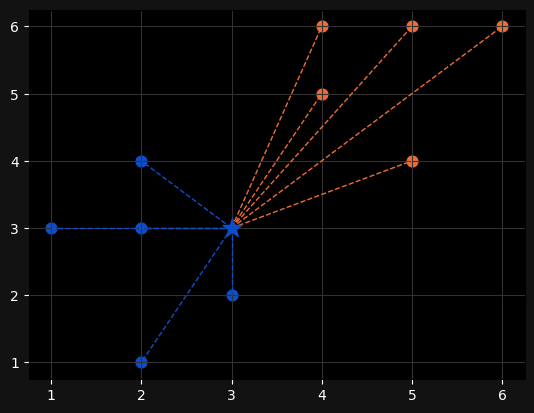

In [ ]:
# Visualization
ax = plt.subplot()
ax.grid(True, color='#323232')
ax.set_facecolor('black')
ax.figure.set_facecolor('#121212')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

[ax.scatter(point[0], point[1], color='#104DCA', s=60) for point in points['blue']]
[ax.scatter(point[0], point[1], color='#EF6C35', s=60) for point in points['orange']]

new_class = clf.predict(new_point)
color = '#EF6C35' if new_class == 'orange' else '#104DCA'
ax.scatter(new_point[0], new_point[1], color=color, marker='*', s=200, zorder=100)

[ax.plot([new_point[0], point[0]], [new_point[1], point[1]], color='#104DCA', linestyle='--', linewidth=1) for point in points['blue']]
[ax.plot([new_point[0], point[0]], [new_point[1], point[1]], color='#EF6C35', linestyle='--', linewidth=1) for point in points['orange']]

plt.show()